![](https://storage.googleapis.com/kaggle-datasets-images/284/617/f00b8c63f63ceb4b34d809447aa38e7e/dataset-cover.jpeg)

https://www.kaggle.com/datasets/gregorut/videogamesales

In [1]:
import pandas as pd
from numpy import absolute, mean, median
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density
df = pd.read_csv("./data/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [129]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [130]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [131]:
df[df['Global_Sales'] == 0.01]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15980,15983,Turok,PC,2008.0,Action,Touchstone,0.00,0.01,0.00,0.0,0.01
15981,15984,Coven and Labyrinth of Refrain,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
15983,15986,Dragon Zakura DS,DS,2007.0,Misc,Electronic Arts,0.00,0.00,0.01,0.0,0.01
15984,15987,Chameleon: To Dye For!,DS,2006.0,Puzzle,505 Games,0.01,0.00,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


In [132]:
dfc = df.copy()
dfc.dropna(inplace=True)

In [133]:
dfc.drop(columns=['Rank',],inplace=True)
dfc

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [134]:
years = dfc['Year']

# Среднее

In [9]:
# Среднее арифметическое
years.mean()

2006.4055613528942

In [10]:
from scipy import stats
# Среднее усечённое
#calculate 10% trimmed mean
stats.trim_mean(years, 0.1)

2006.8590501035833

In [11]:
# Медиана
years.median()

2007.0

# Вариабельность

In [12]:
# Среднее абсолютное отклонение(mean absolute deviation)
# - years.mean(), берут в основном как среднее - медиану
def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
mad(years)

4.507306969675333

In [13]:
# Медианное абсолютное отклонение(median absolute deviation)
stats.median_abs_deviation(years)

4.0

In [14]:
# Дисперсия(variance)
print(years.var())
def variance(data):
    return np.sum((data - mean(data))**2)/(len(data)-1)
variance(years)

34.017032298429996


34.01703229843018

In [15]:
from statistics import variance
variance(years)

34.01703229843019

In [16]:
# Стандартное отклонение(std)
years.var()**0.5

5.8324122195220385

In [17]:
years.std()

5.8324122195220385

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


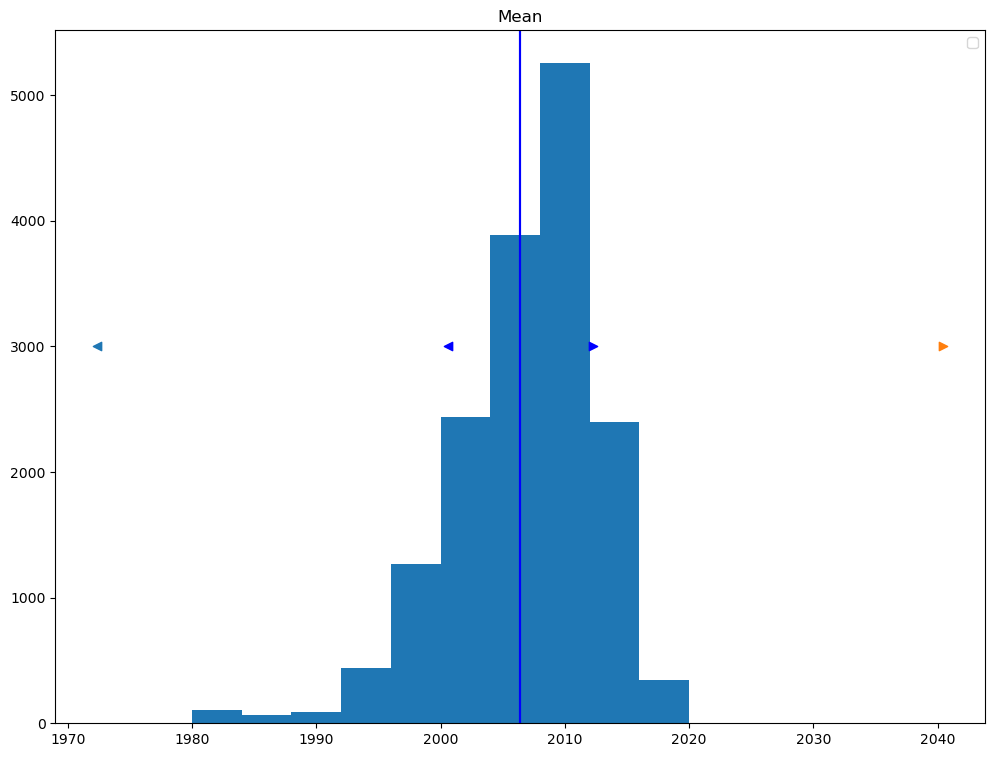

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.title('Mean')
plt.hist(years)
#std
plt.scatter(years.mean() + years.std(),3000,marker='>',color='b')
plt.scatter(years.mean() - years.std(),3000,marker='<',color='b')
#variance
plt.scatter(years.mean() - years.var(),3000,marker='<')
plt.scatter(years.mean() + years.var(),3000,marker='>')
# mean
plt.axvline(years.mean(),color='b')
# Expected value
plt.axvline(years.mean(),color='b')
plt.legend()

Дисперсия показывает, насколько далеко распределены люди в группе \
И наоборот, стандартное отклонение измеряет, насколько наблюдения набора данных отличаются от его среднего значения.

# Обследование распределения данных

In [21]:
# Перцентили
np.percentile(years,np.arange(10,100,10))

array([1998., 2002., 2004., 2006., 2007., 2009., 2010., 2011., 2013.])

In [22]:
# Квантили
np.quantile(years,np.arange(0.1,1,0.1))

array([1998., 2002., 2004., 2006., 2007., 2009., 2010., 2011., 2013.])

<Axes: >

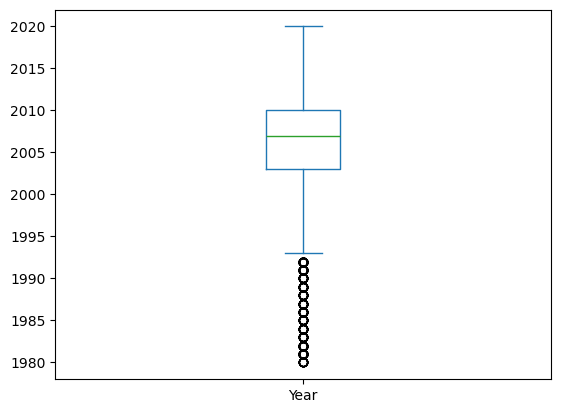

In [23]:
years.plot.box()

# Графики

<Axes: ylabel='Frequency'>

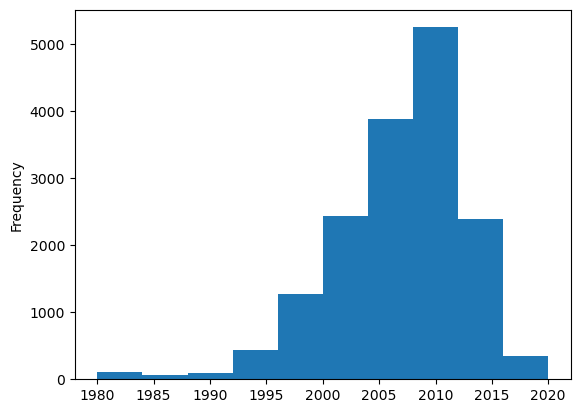

In [24]:
# Гистограммы
years.plot.hist()

<Axes: ylabel='Count'>

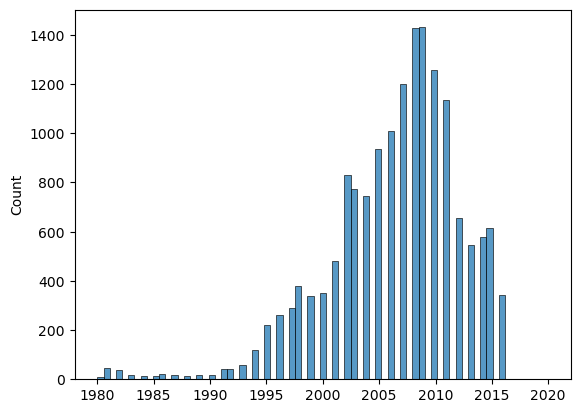

In [25]:
import seaborn as sns
sns.histplot(dfc['Year'].values)

# График плотности

<Axes: ylabel='Density'>

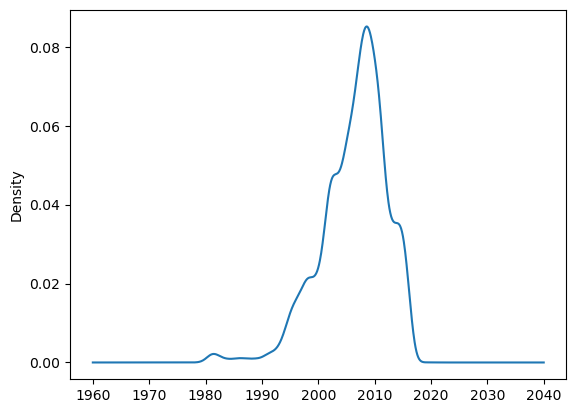

In [26]:
years.plot.density()

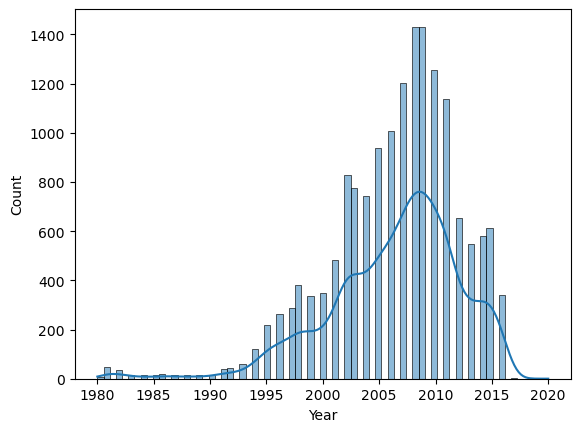

In [27]:
# plotting histogram and density  
# plot for carat using distplot() 
sns.histplot(dfc.Year, kde=True)
  
# visualizing plot using matplotlib.pyplot library 
plt.show() 

# Двоичные и категориальные данные

<BarContainer object of 31 artists>

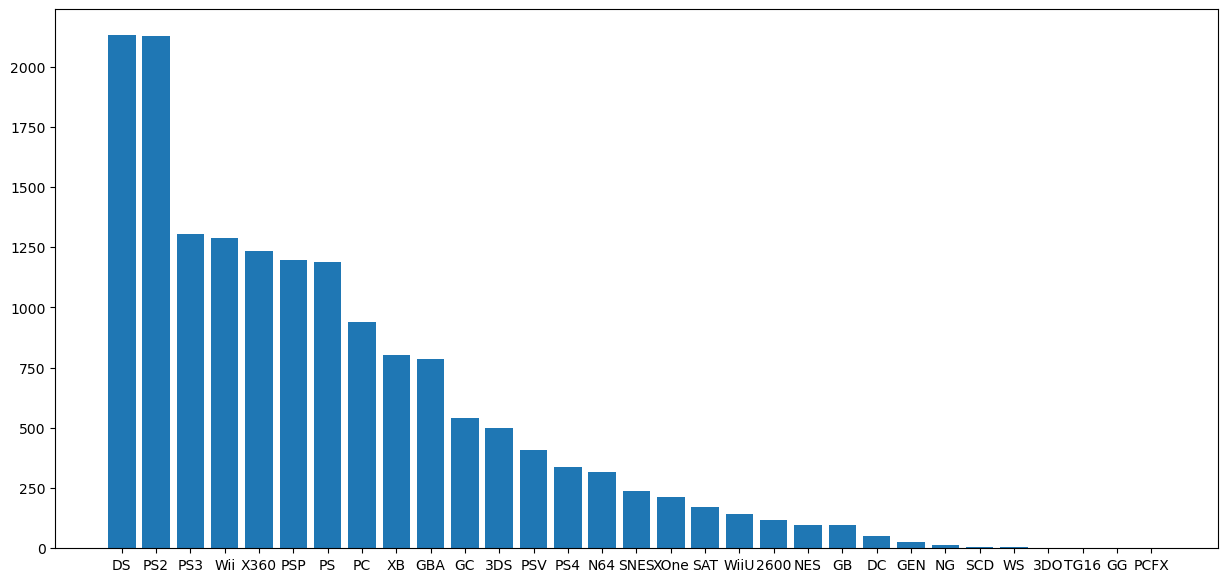

In [42]:
# Столбчатые диаграммы
dfc.Platform.value_counts()
plt.figure(figsize=(15,7))
plt.bar(dfc.Platform.value_counts().index,dfc.Platform.value_counts().values)

In [29]:
# Мода
years.mode()

0    2009.0
Name: Year, dtype: float64

In [19]:
# Мат ожидание (expected value)
sum(list(years.value_counts().index) * (years.value_counts()/len(years)))
''' 
В осномном мат ожидание == среднему арифметическому, но когда мы хотим посчитать ожидаемое среднее при определённых процентах
не имея при этом данных на руках мы можем только по выдуманным процентам посчитать среднее ожидаемое, оно же среднее взвешенное по вероятностям
'''

2006.405561352894

([<matplotlib.patches.Wedge at 0x13e20027e10>,
 [Text(1.058381311499255, 0.2997148636105941, '2009'),
  Text(0.7445578563538295, 0.8097120466818993, '2008'),
  Text(0.24619095090106694, 1.0720960851035828, '2010'),
  Text(-0.2703153843397028, 1.0662690059217135, '2007'),
  Text(-0.7077612342316867, 0.8420653391031124, '2011'),
  Text(-0.9864446545768559, 0.48675141854620996, '2006'),
  Text(-1.0961674251538196, 0.09174407900047561, '2005'),
  Text(-1.063910065026676, -0.27945549473025993, '2002'),
  Text(-0.9283490505341179, -0.5900576585151674, '2003'),
  Text(-0.7184211377380421, -0.8329892369359748, '2004'),
  Text(-0.47042149518747445, -0.9943357666631434, '2012'),
  Text(-0.21549653109298292, -1.0786849609996847, '2015'),
  Text(0.03637302096634537, -1.0993984734143403, '2014'),
  Text(0.27237110591052016, -1.0657457392197636, '2013'),
  Text(0.47693077559907754, -0.9912300617346422, '2001'),
  Text(0.6341976254581287, -0.8987732594282449, '1998'),
  Text(0.7537220836490919, -0.80

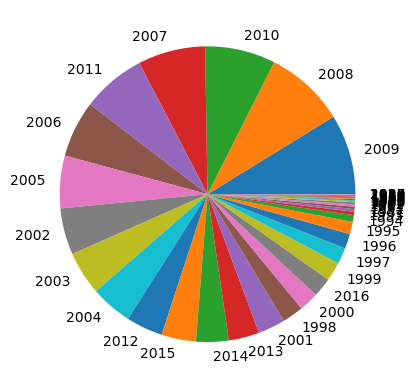

In [43]:
# Круговые диаграммы(pie charts)
plt.pie(years.value_counts(),labels = list(map(int,list(years.value_counts().index))))

# Корреляция

In [11]:
dfc.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
dfc.select_dtypes(np.number)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,2002.0,0.01,0.00,0.00,0.00,0.01
16594,2003.0,0.01,0.00,0.00,0.00,0.01
16595,2008.0,0.00,0.00,0.00,0.00,0.01
16596,2010.0,0.00,0.01,0.00,0.00,0.01


In [19]:
# Корреляционная матрица
dfc.select_dtypes(np.number).corr(method='pearson', min_periods=1, numeric_only=False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


<Axes: >

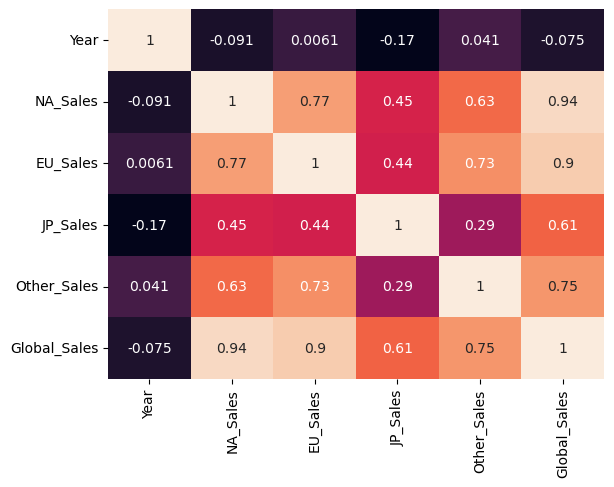

In [20]:
sns.heatmap(dfc.select_dtypes(np.number).corr(),annot=True,cbar=False) 

Text(0, 0.5, 'Global_Sales')

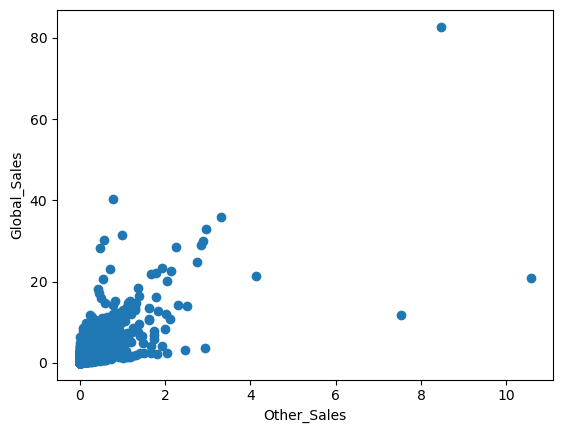

In [24]:
# Диаграмма рассеяния scatterplot
plt.scatter(dfc.Other_Sales,dfc.Global_Sales)
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")

# Исследование двух или более переменных

# Двух числовых данных

<Axes: xlabel='Other_Sales', ylabel='Global_Sales'>

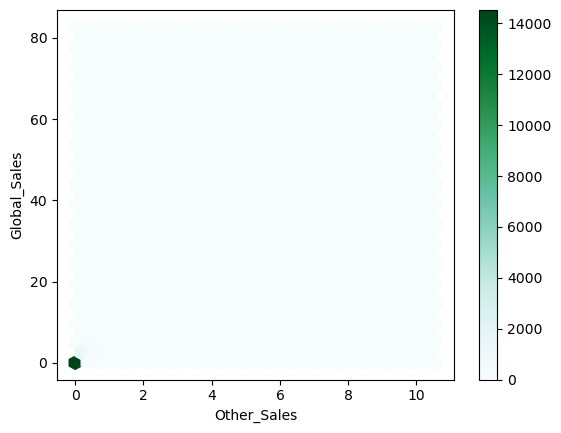

In [57]:
# Графики с шестиугольной сеткой (hexagonal binning)
# Для норм графика нужно много сопряжённых данных
dfc.plot.hexbin(x='Other_Sales', y='Global_Sales', gridsize=30, )

<Axes: xlabel='Other_Sales', ylabel='Global_Sales'>

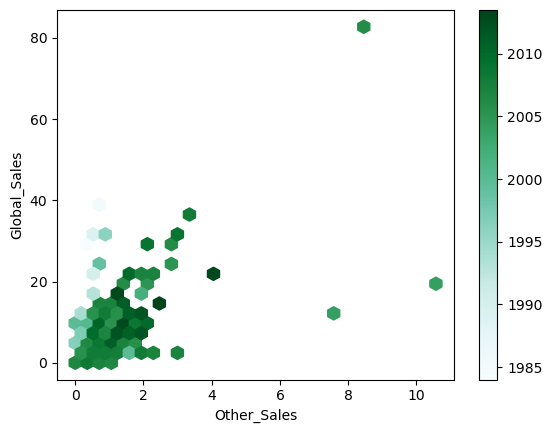

In [58]:
# Тут практически scatter но где цветастность - год
dfc.plot.hexbin(x='Other_Sales', y='Global_Sales',C='Year', gridsize=30, )

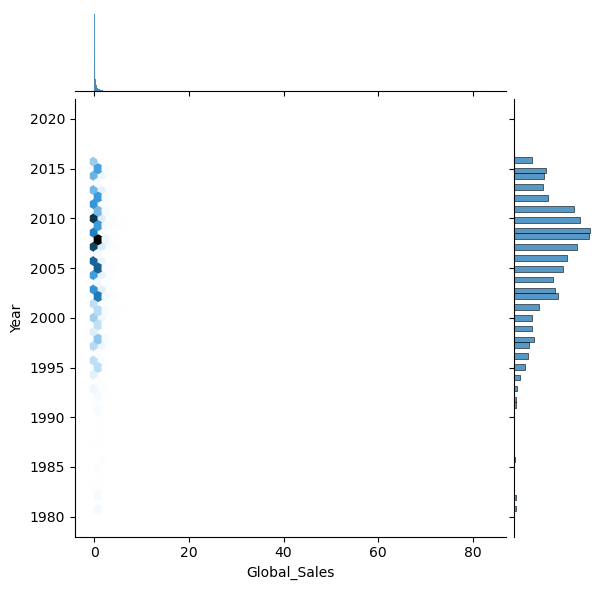

In [60]:
# Плотность данных продаж по годам
fig = sns.jointplot(x = dfc.Global_Sales,y = dfc.Year, kind ="hex",height=6, ratio=5, space=0.1,)
#jointplot интересная штука, много показывает и вариабельность большая графиков

### New datasets

![](https://storage.googleapis.com/kaggle-datasets-images/5348241/8893551/815d506c298efc654a271e22e5a90c52/dataset-cover.jpg?t=2024-07-07-09-01-50)

https://www.kaggle.com/datasets/melissamonfared/scrabble-games

In [2]:
scr_df = pd.read_csv("./data/scrabble_games.csv")
scr_df

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542637,1823779,3021,False,15830,Ella Bartholomew,0,0,923,21,2750,Poppy Thompson,0,0,771,30,6,3,1994-09-17,False
1542638,1823780,3021,False,1859,Claire Ullman,0,730,756,23,2750,Poppy Thompson,0,0,771,30,8,3,1994-09-17,False
1542639,1823781,3021,False,2750,Poppy Thompson,0,0,771,30,6345,Myra Odess,0,1150,1111,16,2,3,1994-09-17,False
1542640,1823782,3021,False,2750,Poppy Thompson,0,0,771,30,2441,Avis Turner,0,739,724,27,3,3,1994-09-17,False


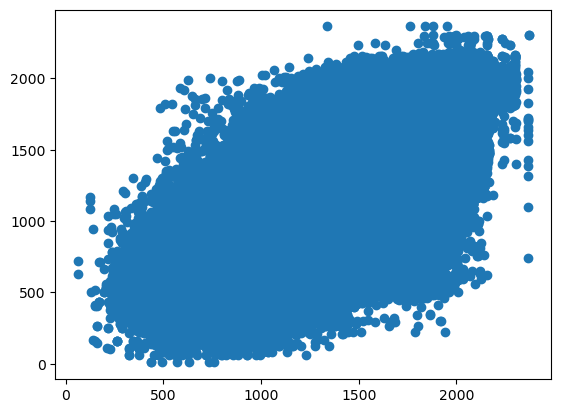

In [13]:
sample = scr_df[(scr_df.losernewrating > 0) & (scr_df.winnernewrating > 0)]
plt.scatter(sample.winnernewrating,sample.losernewrating)

<Axes: xlabel='winnernewrating', ylabel='losernewrating'>

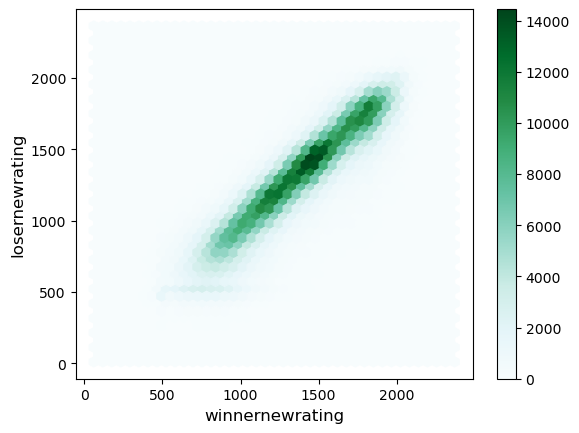

In [121]:
sample.plot.hexbin(x="winnernewrating",y="losernewrating", gridsize=40)

<Axes: xlabel='winnernewrating', ylabel='losernewrating'>

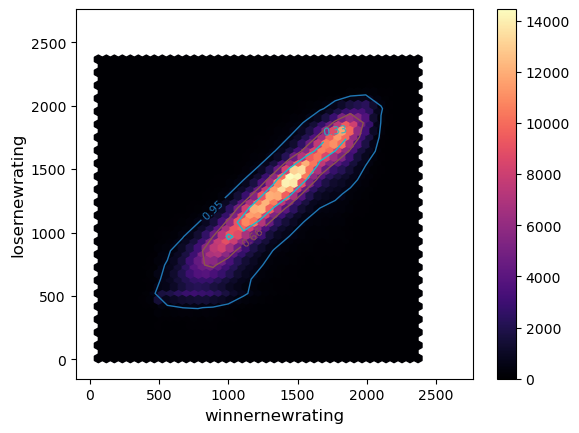

In [125]:
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density
# Контурные графики (contour plots)
sample = scr_df.loc[(scr_df.losernewrating > 0) & (scr_df.winnernewrating > 0), ["winnernewrating","losernewrating"]]
ax = sample.plot.hexbin(x="winnernewrating",y="losernewrating", gridsize=40,cmap='magma')
sample.pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33],cmap="tab10")

In [151]:
sample = scr_df.loc[(scr_df.losernewrating > 0) & (scr_df.winnernewrating > 0), ["winnernewrating","losernewrating"]]
ax = sample.pyroplot.scatter(ax=ax, s=10, alpha=0.3, c="#ABD5D7", zorder=2)
sample.pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33],cmap="tab10")
plt.show()

![](https://storage.googleapis.com/kaggle-datasets-images/360179/705412/2719d06966d669c5da5a2e420c84febb/dataset-cover.jpg?t=2019-09-26-20-21-23)

https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset

In [3]:
fifa_df = pd.read_csv("./data/players_20.csv")
fifa_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


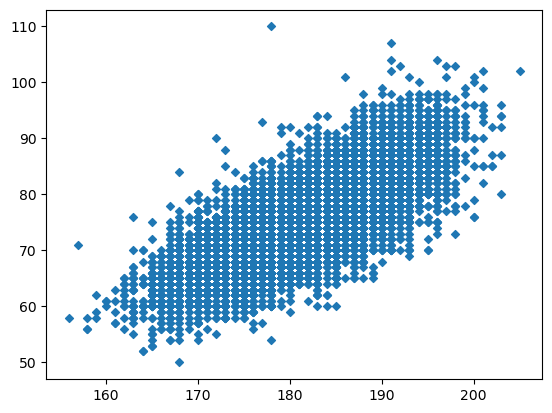

In [4]:
sample = fifa_df
plt.scatter(sample.height_cm,sample.weight_kg)

<Axes: xlabel='height_cm', ylabel='weight_kg'>

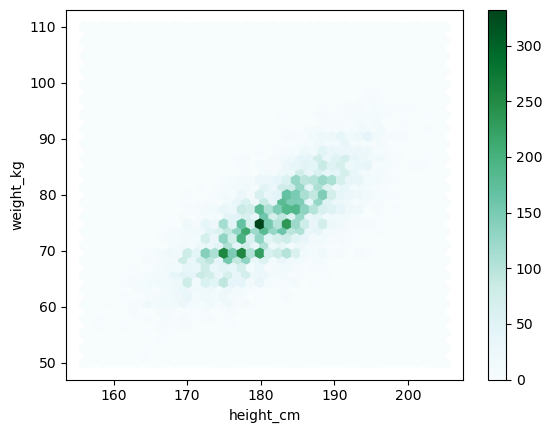

In [25]:
sample.plot.hexbin(x="height_cm",y="weight_kg", gridsize=40)

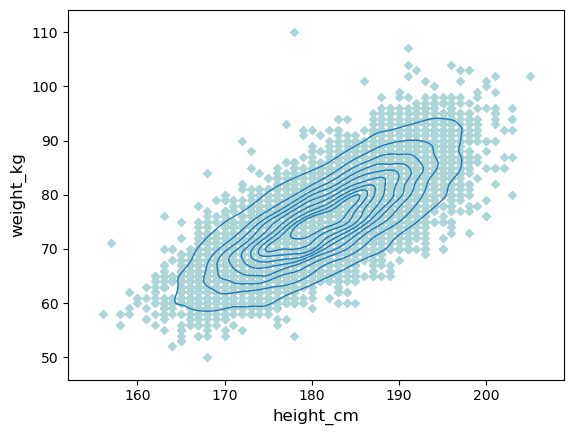

In [115]:
# Выполняется долго, мучался пока подбирал датасет
ax = sns.kdeplot(x = sample.height_cm,y=sample.weight_kg)
ax.scatter(sample.height_cm,sample.weight_kg,c='#ABD5D7')

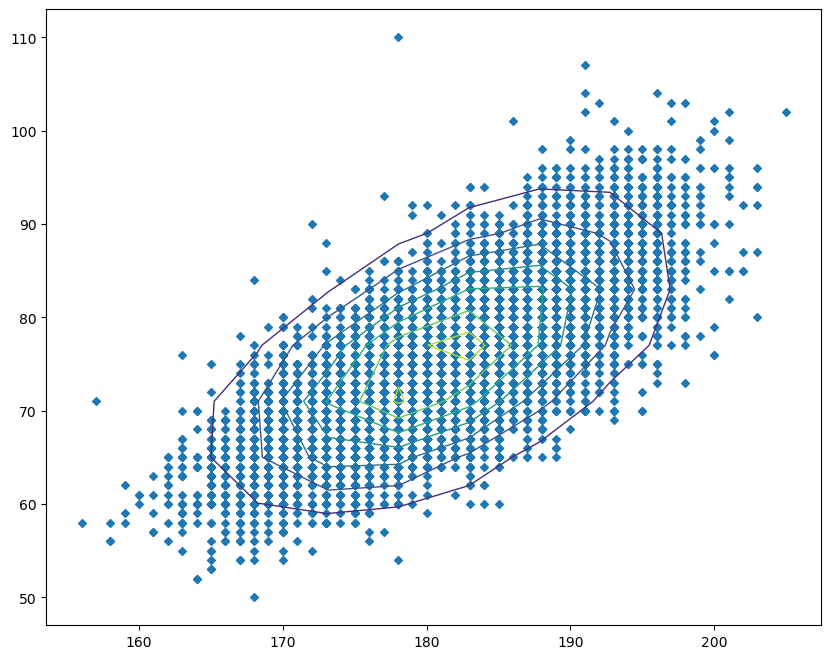

In [30]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter 
fig = plt.figure(figsize=(10,8))
x = sample.height_cm
y = sample.weight_kg
h, xedges, yedges = np.histogram2d(x, y, bins=10)
h = gaussian_filter(h, sigma=0.7)
xbins = xedges[:-1] + (xedges[1] - xedges[0]) / 2
ybins = yedges[:-1] + (yedges[1] - yedges[0]) / 2

h = h.T
CS = plt.contour(xbins, ybins, h)
plt.scatter(x, y)
plt.show()

## Pyrolite

https://pyrolite.readthedocs.io/en/main/examples/plotting/density.html

In [30]:
!pip install pyrolite

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.0 MB 2.4 MB/s eta 0:00:01
     ----------------- ---------------------- 0.5/1.0 MB 4.7 MB/s eta 0:00:01
     --------------------------------- ------ 0.8/1.0 MB 5.8 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/880.1 kB ? eta -:--:--
   ----------------- --------------------- 389.1/880.1 kB 12.2 MB/s eta 0:00:01
   ----------------------------------- ---- 778.2/880.1 kB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 880.1/880.1 kB 8.0 MB/s eta 0:00:00
  Created wheel for periodictable: filename=periodictable-1.7.1-py3-none-any.whl size=752532 sha256=9571b52cf2314345c3398415c7


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


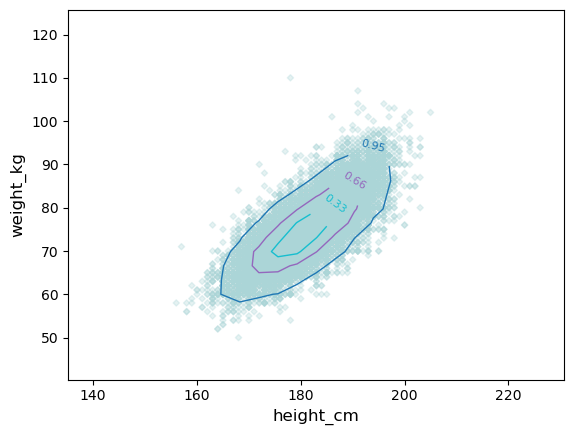

In [116]:
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density
ax = fifa_df.loc[:, ["height_cm","weight_kg"]].pyroplot.scatter(s=10, alpha=0.3, c="#ABD5D7", zorder=2)
fifa_df.loc[:, ["height_cm","weight_kg"]].pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33],cmap="tab10")
plt.show()

In [76]:
np.arange(1,0,-0.3)

array([1. , 0.7, 0.4, 0.1])

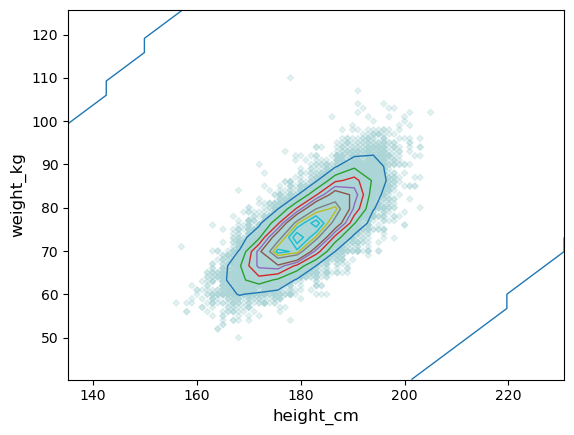

In [117]:
ax = fifa_df.loc[:, ["height_cm","weight_kg"]].pyroplot.scatter(s=10, alpha=0.3, c="#ABD5D7", zorder=2)
fifa_df.loc[:, ["height_cm","weight_kg"]].pyroplot.density(ax=ax, contours=list(np.arange(1,0,-0.1)),cmap="tab10",label_contours=False)
plt.show()

<Axes: xlabel='height_cm', ylabel='weight_kg'>

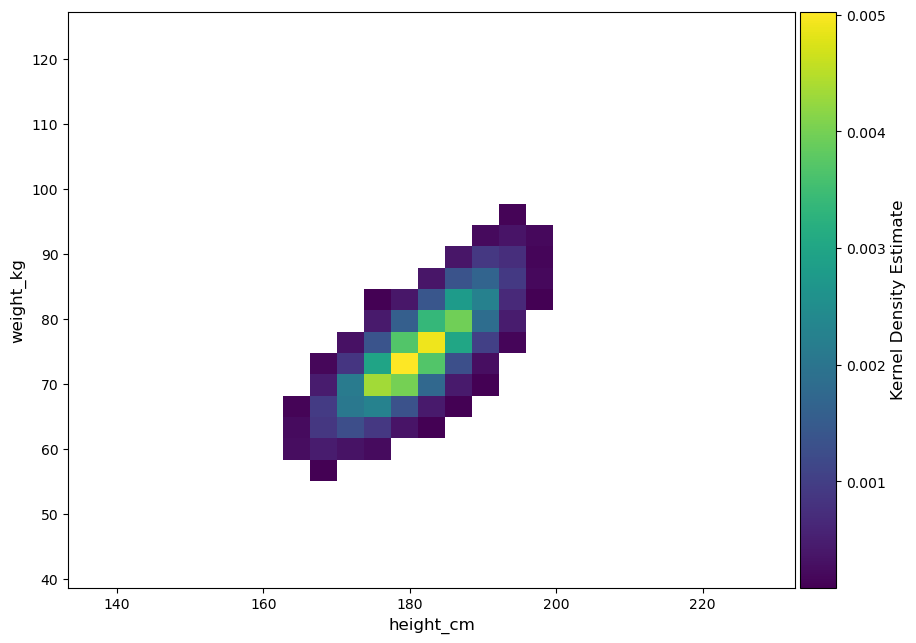

In [108]:
fig = plt.figure() 
ax = fig.add_axes([0, 0, 1.2, 1.2],) 
fifa_df.loc[:, ["height_cm","weight_kg"]].pyroplot.density(ax = ax,colorbar=True)

# Matplotlib colours
https://matplotlib.org/stable/users/explain/colors/colors.html

In [112]:
from matplotlib import colormaps
import matplotlib
print(*list(colormaps),sep='\n')

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cu

# Две категории

In [143]:
# Таблицы сопряженности (contingency tables) crosstabs
# Подсчёт игр по жанрам на разных платформах
pd.crosstab(dfc["Platform"],dfc["Genre"])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,85,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,335,238,36,389,89,236,66,196,42,280,146,78
GB,6,5,0,8,18,15,2,21,1,5,9,7
GBA,162,36,23,86,139,39,64,73,40,18,88,18
GC,98,20,42,35,73,12,60,25,48,12,106,11
GEN,3,2,5,1,7,0,1,3,1,0,3,1


In [148]:
# Подсчёт средних продаж игр по жанрам на платформах отсортированный по жанру экшн
pd.crosstab(dfc["Platform"],dfc["Genre"],dfc["Global_Sales"],aggfunc="mean").sort_values(by='Action',ascending=False)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
NES,2.211538,4.380000,1.635000,1.795000,3.420714,1.500000,2.445000,1.707273,5.088571,NaN,1.917857,NaN
GB,1.320000,3.432000,NaN,1.668750,2.993333,3.164667,2.275000,4.201905,1.200000,0.710000,1.005556,1.150000
GEN,0.913333,0.095000,1.180000,0.030000,2.207143,NaN,0.260000,0.090000,0.130000,NaN,1.066667,0.190000
SNES,0.840000,0.375000,1.078000,0.295294,2.525000,0.490769,1.498889,0.728600,0.607000,0.625556,0.364694,0.332000
PS,0.816494,0.310000,0.672963,0.590789,1.003281,0.377500,0.714514,0.807216,0.409479,0.422167,0.540769,0.309571
PS3,0.815067,0.317639,0.680263,0.379421,0.829167,0.230000,0.812222,0.643077,1.263226,0.357333,0.642429,0.216818
N64,0.795676,0.112500,0.761379,0.621667,1.204333,0.284167,0.703333,0.432857,0.802917,1.019000,0.412658,1.147778
PS2,0.789652,0.107959,0.610890,0.452706,0.713960,0.327778,0.727406,0.500273,0.685316,0.474831,0.671714,0.214857
X360,0.753679,0.324043,0.579077,0.732213,0.474583,0.118333,0.638529,0.959600,1.407259,0.391667,0.639209,0.361852


In [149]:
# Подсчёт средних продаж игр по жанрам на платформах отсортированный по жанру стратегии
pd.crosstab(dfc["Platform"],dfc["Genre"],dfc["Global_Sales"],aggfunc="mean").sort_values(by='Strategy',ascending=False)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
GB,1.320000,3.432000,NaN,1.668750,2.993333,3.164667,2.275000,4.201905,1.200000,0.710000,1.005556,1.150000
N64,0.795676,0.112500,0.761379,0.621667,1.204333,0.284167,0.703333,0.432857,0.802917,1.019000,0.412658,1.147778
GBA,0.334938,0.336111,0.183043,0.331395,0.561727,0.310000,0.293750,0.879589,0.090000,0.328333,0.186477,0.413889
WiiU,0.307143,0.056667,1.272000,0.582381,1.327500,0.332500,2.590000,0.411667,0.617000,0.210000,0.415000,0.413333
GC,0.380102,0.296500,0.438810,0.470000,0.392603,0.380833,0.363167,0.521200,0.283958,0.715833,0.231038,0.392727
X360,0.753679,0.324043,0.579077,0.732213,0.474583,0.118333,0.638529,0.959600,1.407259,0.391667,0.639209,0.361852
SNES,0.840000,0.375000,1.078000,0.295294,2.525000,0.490769,1.498889,0.728600,0.607000,0.625556,0.364694,0.332000
PS,0.816494,0.310000,0.672963,0.590789,1.003281,0.377500,0.714514,0.807216,0.409479,0.422167,0.540769,0.309571
PC,0.190497,0.155231,0.028000,0.382273,0.044545,0.036800,0.067857,0.459903,0.299586,0.461875,0.245102,0.247989


# Числа и категории

<Axes: xlabel='Platform', ylabel='Year'>

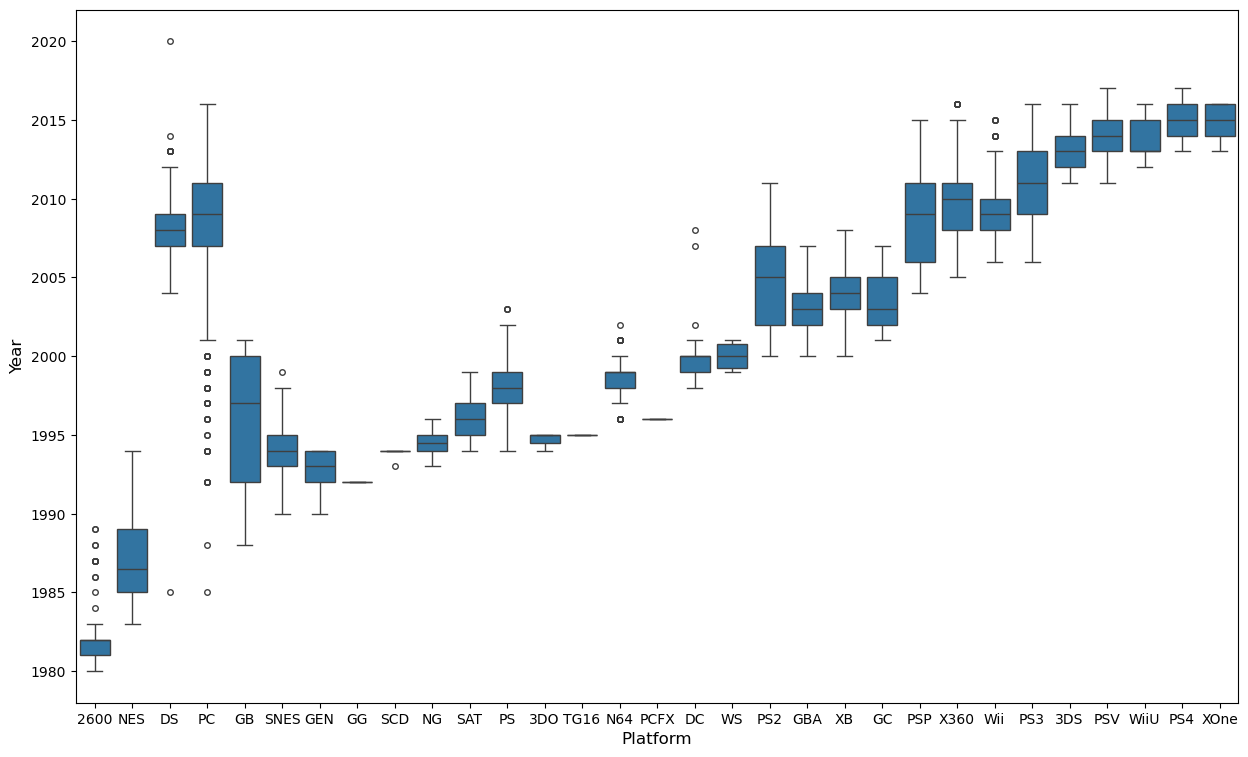

In [157]:
# Коробчатые диаграммы (Boxplot) 
# Можно использовать не по только числовым данным но и по классам с числами, просматривая распределения различных сегментов
plt.figure(figsize=(15,9))
# Распределение выпуска игр на разных платформах по годам
sns.boxplot(data=dfc.sort_values('Year'), x="Platform", y="Year")

<Axes: xlabel='tie', ylabel='winneroldrating'>

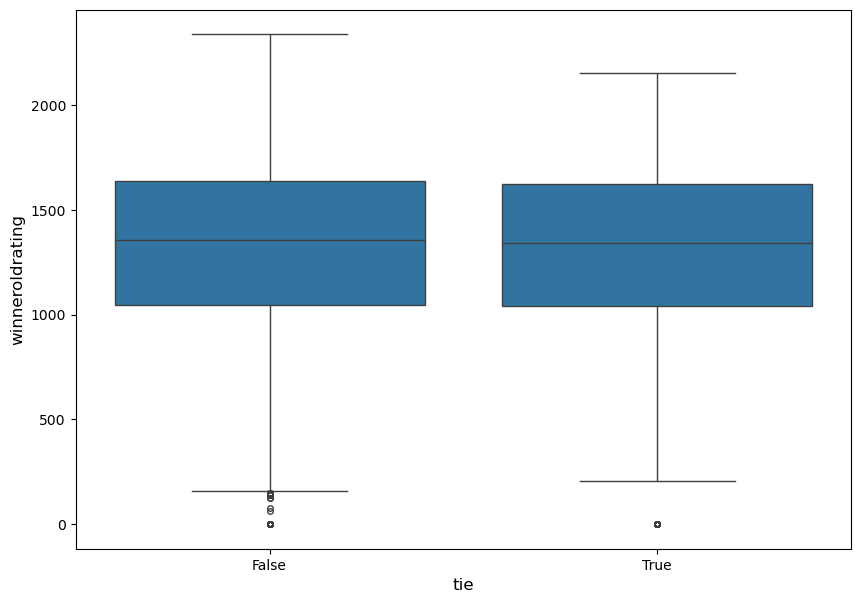

In [164]:
plt.figure(figsize=(10,7))
sns.boxplot(data=scr_df.sort_values('winneroldrating'), x="tie", y="winneroldrating")

<Axes: xlabel='Platform', ylabel='Year'>

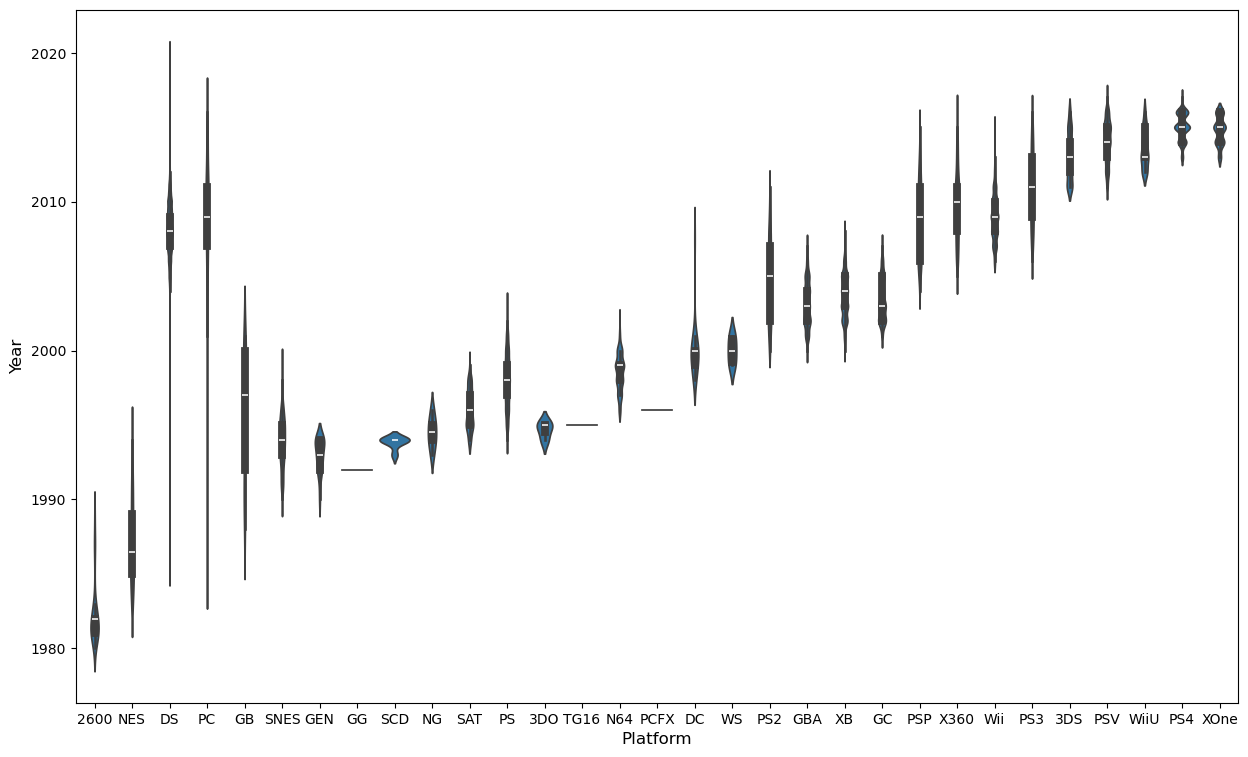

In [165]:
# Скрипичные графики (violin plots)
# Также показывают распределение но с плотностью данных
plt.figure(figsize=(15,9))
sns.violinplot(data=dfc.sort_values('Year'), x="Platform", y="Year")

<Axes: xlabel='tie', ylabel='winneroldrating'>

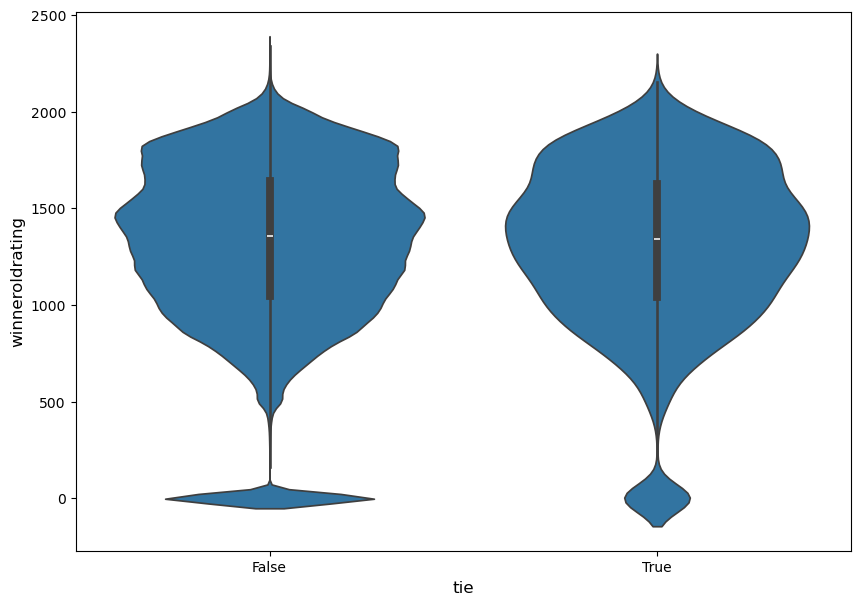

In [166]:
plt.figure(figsize=(10,7))
sns.violinplot(data=scr_df.sort_values('winneroldrating'), x="tie", y="winneroldrating")

Text(0, 0.5, 'Рейтинг')

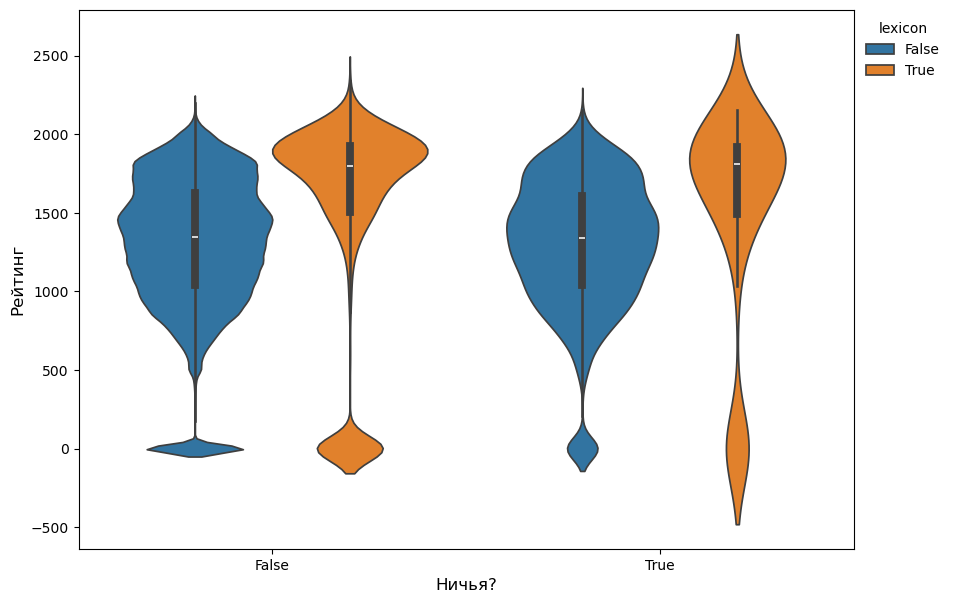

In [171]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(data=scr_df.sort_values('winneroldrating'), x="tie", y="winneroldrating",hue='lexicon')
ax.set_xlabel('Ничья?')
ax.set_ylabel('Рейтинг')

# Выборочная статистика

In [66]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<Axes: ylabel='Frequency'>

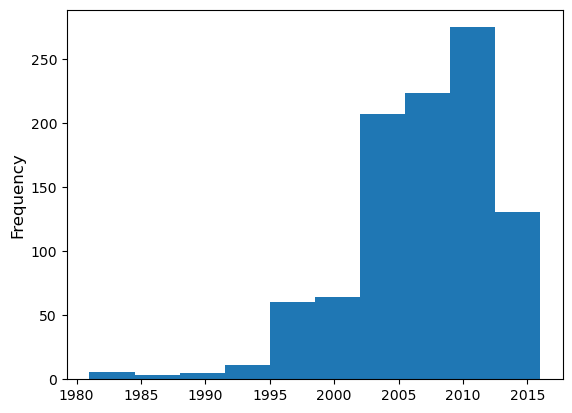

In [70]:
# Основывается на случайном отборе
df.sample(1000)['Year'].plot.hist()

## Ответвление в pandas

### shift

In [90]:
# Отступ в начале данных
df.sample(1000*5)["Year"].shift()

7003       NaN
6826    2007.0
4548    2013.0
2836    2006.0
8338    1999.0
         ...  
5889    2006.0
5626    2009.0
241     2007.0
6410    2002.0
3611    1996.0
Name: Year, Length: 5000, dtype: float64

In [92]:
df.sample(1000*5)["Year"].shift(3)

9174        NaN
9439        NaN
8559        NaN
3397     2002.0
2915     2010.0
          ...  
383      2006.0
13183    2010.0
3524     1989.0
4244     2013.0
5210     2007.0
Name: Year, Length: 5000, dtype: float64

### rolling

In [105]:
df['Year'][:60]

0     2006.0
1     1985.0
2     2008.0
3     2009.0
4     1996.0
5     1989.0
6     2006.0
7     2006.0
8     2009.0
9     1984.0
10    2005.0
11    2005.0
12    1999.0
13    2007.0
14    2009.0
15    2010.0
16    2013.0
17    2004.0
18    1990.0
19    2005.0
20    2006.0
21    1989.0
22    1988.0
23    2013.0
24    2002.0
25    2002.0
26    2010.0
27    2005.0
28    2001.0
29    2011.0
30    1998.0
31    2010.0
32    2013.0
33    2015.0
34    2012.0
35    2012.0
36    2009.0
37    2011.0
38    2001.0
39    2008.0
40    2010.0
41    2005.0
42    2011.0
43    2007.0
44    2014.0
45    2009.0
46    1996.0
47    2004.0
48    2007.0
49    2014.0
50    1992.0
51    2008.0
52    1997.0
53    2011.0
54    2010.0
55    2009.0
56    2008.0
57    1993.0
58    2004.0
59    2004.0
Name: Year, dtype: float64

In [109]:
# Рассчитываем среднее, складывая по два смотря назад
df['Year'][:60].rolling(2).mean()

0        NaN
1     1995.5
2     1996.5
3     2008.5
4     2002.5
5     1992.5
6     1997.5
7     2006.0
8     2007.5
9     1996.5
10    1994.5
11    2005.0
12    2002.0
13    2003.0
14    2008.0
15    2009.5
16    2011.5
17    2008.5
18    1997.0
19    1997.5
20    2005.5
21    1997.5
22    1988.5
23    2000.5
24    2007.5
25    2002.0
26    2006.0
27    2007.5
28    2003.0
29    2006.0
30    2004.5
31    2004.0
32    2011.5
33    2014.0
34    2013.5
35    2012.0
36    2010.5
37    2010.0
38    2006.0
39    2004.5
40    2009.0
41    2007.5
42    2008.0
43    2009.0
44    2010.5
45    2011.5
46    2002.5
47    2000.0
48    2005.5
49    2010.5
50    2003.0
51    2000.0
52    2002.5
53    2004.0
54    2010.5
55    2009.5
56    2008.5
57    2000.5
58    1998.5
59    2004.0
Name: Year, dtype: float64

In [125]:
# Теперь если у нас сзади нету столько значений сколько window из-за min_periods=1 мы считаем mean() от сколько есть, смотря назад
# 0 Тоесть первое никак не изменяется == 2006
# 1 2006+1985/2 = 1995.5
# 2 2006.0 + 1985.0 + 2008.0/3 = 1999.666667
# И т.д.
df['Year'][:60].rolling(5,min_periods=1).mean()

0     2006.000000
1     1995.500000
2     1999.666667
3     2002.000000
4     2000.800000
5     1997.400000
6     2001.600000
7     2001.200000
8     2001.200000
9     1998.800000
10    2002.000000
11    2001.800000
12    2000.400000
13    2000.000000
14    2005.000000
15    2006.000000
16    2007.600000
17    2008.600000
18    2005.200000
19    2004.400000
20    2003.600000
21    1998.800000
22    1995.600000
23    2000.200000
24    1999.600000
25    1998.800000
26    2003.000000
27    2006.400000
28    2004.000000
29    2005.800000
30    2005.000000
31    2005.000000
32    2006.600000
33    2009.400000
34    2009.600000
35    2012.400000
36    2012.200000
37    2011.800000
38    2009.000000
39    2008.200000
40    2007.800000
41    2007.000000
42    2007.000000
43    2008.200000
44    2009.400000
45    2009.200000
46    2007.400000
47    2006.000000
48    2006.000000
49    2006.000000
50    2002.600000
51    2005.000000
52    2003.600000
53    2004.400000
54    2003.600000
55    2007

In [126]:
# А тут, кроме того, что мы считаем mean от того что есть, мы сначала считаем все средние значения 
# а потом пропускаем по шагу в 5 достигая этого среднего из скольки то значений
df['Year'][:60].rolling(5,min_periods=1,step=5).mean()

0     2006.0
5     1997.4
10    2002.0
15    2006.0
20    2003.6
25    1998.8
30    2005.0
35    2012.4
40    2007.8
45    2009.2
50    2002.6
55    2007.0
Name: Year, dtype: float64

### Выборки

<Axes: ylabel='Frequency'>

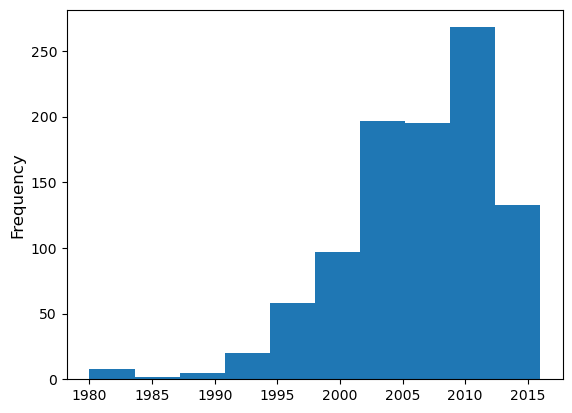

In [152]:
# выборка с 1000 значениями
df.sample(1000)["Year"].plot.hist()

<Axes: ylabel='Frequency'>

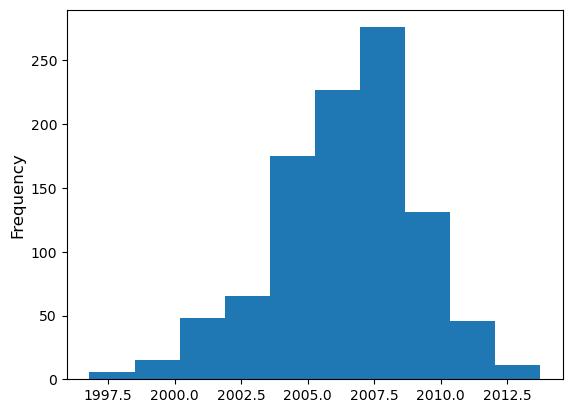

In [150]:
# выборка с 1000 средними из 5 значений
df.sample(1000*5)["Year"].rolling(5,min_periods=1,step=5).mean().plot.hist()

<Axes: ylabel='Frequency'>

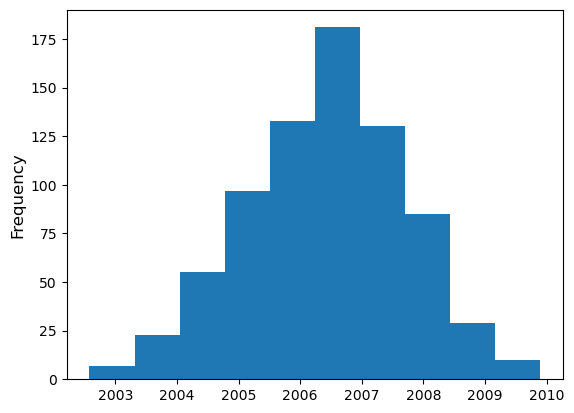

In [151]:
# выборка с 1000 средними из 20 значений
df.sample(1000*15)["Year"].rolling(20,min_periods=1,step=20).mean().plot.hist()

Гистограмма индивидуальных значений данных широко развернута и скошена к более высоким значениям. Обе гистограммы средних из 5 и 15 значений  \
более компактны и более колоколообразные.